# It's Raining Bells, Hallelujah!

<img src="https://mcsun.org/wp-content/uploads/2020/05/Banner-Animal-Crossing-New-Horizons.jpg">

## A guide to living large in Animal Crossing: New Horizons

### by Kwame V. Taylor

It's Raining Bells, Hallelujah is data-driven guide to getting rich and staying rich with maximized efficiency on the Nintendo Switch video game, Animal Crossing: New Horizons.

Bells are the currency used in the video game, Animal Crossing: New Horizons. Users can buy and sell items using bells, as well as exchange bells and items with both in-game characters (also known as Non-Playable Characters, or NPCs) and other users.

### Set up environment

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# default viz size settings
plt.rc('figure', figsize=(9, 7))
plt.rc('font', size=13)

### Acquire data

Let's look at insects first, since I already know that people love to bank big on catching tarantulas and scorpions.

In [3]:
insects = pd.read_csv('insects.csv')

In [4]:
insects.sort_values(by="Sell", ascending=False).head(6)

,#,Name,Sell,Where/How,Weather,Total Catches to Unlock,Spawn Rates,NH Jan,NH Feb,NH Mar,...,SH Oct,SH Nov,SH Dec,Color 1,Color 2,Icon Filename,Critterpedia Filename,Furniture Filename,Internal ID,Unique Entry ID
29,61,giraffe stag,12000,On palm trees,Any weather,100,1,NaN,NaN,NaN,...,NaN,NaN,NaN,Black,Black,Ins77,InsectGirafanokogirikuwagata,FtrInsectGirafanokogirikuwagata,3482,PSChjzMhGwhnsHTs4
30,60,golden stag,12000,On palm trees,Any weather,100,1,NaN,NaN,NaN,...,NaN,NaN,NaN,Black,Yellow,Ins50,InsectOugononikuwagata,FtrInsectOugononikuwagata,638,2C8cSphidFCBPxYEe
39,65,horned hercules,12000,On palm trees,Any weather,100,1,NaN,NaN,NaN,...,NaN,NaN,NaN,Yellow,Black,Ins54,InsectHerakuresuohkabuto,FtrInsectHerakuresuohkabuto,600,TqhEomNEMDZ2wcTpk
65,52,scarab beetle,10000,On trees (any kind),Any weather,50,3,NaN,NaN,NaN,...,NaN,NaN,NaN,Black,Beige,Ins43,InsectPurachinakogane,FtrInsectPurachinakogane,639,2HXdFD8s6BmYYMf4u
27,57,giant stag,10000,On trees (any kind),Any weather,50,5,NaN,NaN,NaN,...,NaN,NaN,NaN,Black,Black,Ins47,InsectOhkuwagata,FtrInsectOhkuwagata,637,KhrTLzayFz23zz2kn
31,54,goliath beetle,8000,On palm trees,Any weather,100,2,NaN,NaN,NaN,...,NaN,NaN,5 PM – 8 AM,Red,Black,Ins55,InsectGoraiasuohtsunohanamuguri,FtrInsectGoraiasuohtsunohanamuguri,596,wZQMZfhtRyPFAapmF


### Prepare data

First I'll set the index to #.

In [4]:
insects = insects.set_index('#')

Then I'll drop some of the columns I won't be using.

In [5]:
insects = insects.drop(columns=['Icon Filename', 'Critterpedia Filename', 'Furniture Filename',
       'Internal ID', 'Unique Entry ID'])

And impute NaNs with 0s.

In [6]:
insects = insects.fillna(0)

In [30]:
insects.isna().sum()

Name                       0
Sell                       0
Where/How                  0
Weather                    0
Total Catches to Unlock    0
Spawn Rates                0
NH Jan                     0
NH Feb                     0
NH Mar                     0
NH Apr                     0
NH May                     0
NH Jun                     0
NH Jul                     0
NH Aug                     0
NH Sep                     0
NH Oct                     0
NH Nov                     0
NH Dec                     0
SH Jan                     0
SH Feb                     0
SH Mar                     0
SH Apr                     0
SH May                     0
SH Jun                     0
SH Jul                     0
SH Aug                     0
SH Sep                     0
SH Oct                     0
SH Nov                     0
SH Dec                     0
Color 1                    0
Color 2                    0
dtype: int64

In [7]:
insects.head(3)

,Name,Sell,Where/How,Weather,Total Catches to Unlock,Spawn Rates,NH Jan,NH Feb,NH Mar,NH Apr,...,SH May,SH Jun,SH Jul,SH Aug,SH Sep,SH Oct,SH Nov,SH Dec,Color 1,Color 2
#,,,,,,,,,,,,,,,,,,,,,
10,agrias butterfly,3000,Flying near flowers,Any except rain,20,5,0,0,0,8 AM – 5 PM,...,0,0,0,0,0,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,Pink,Green
69,ant,80,On rotten turnips,Any weather,0,0,All day,All day,All day,All day,...,All day,All day,All day,All day,All day,All day,All day,All day,Black,White
14,Atlas moth,3000,On trees (any kind),Any weather,20,5,0,0,0,7 PM – 4 AM,...,0,0,0,0,0,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,Orange,Yellow


Looks cleaned up enough to head into data exploration.

### Feature Engineering

Idea for feature engineering: Sell / Spawn Rates

### Exploratory Data Analysis

In [13]:
insects.describe()

,Sell,Total Catches to Unlock
count,80.000000,80.00000
mean,2220.500000,17.50000
std,3209.388877,30.08427
min,10.000000,0.00000
25%,237.500000,0.00000
50%,600.000000,0.00000
75%,2625.000000,20.00000
max,12000.000000,100.00000


In [15]:
pd.options.display.max_rows = 500

In [17]:
insects.sort_values(by='Sell')

,Name,Sell,Where/How,Weather,Total Catches to Unlock,Spawn Rates,NH Jan,NH Feb,NH Mar,NH Apr,...,SH May,SH Jun,SH Jul,SH Aug,SH Sep,SH Oct,SH Nov,SH Dec,Color 1,Color 2
#,,,,,,,,,,,,,,,,,,,,,
31,cicada shell,10,On hardwood/cedar trees,Any weather,50,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Brown,Green
72,fly,60,"Flying near trash (boots, tires, cans) or rott...",Any weather,0,0,All day,All day,All day,All day,...,All day,All day,All day,All day,All day,All day,All day,All day,Black,White
74,flea,70,On villagers,Any weather,0,5–10,0,0,0,All day,...,All day,0,0,0,0,All day,All day,All day,Brown,White
69,ant,80,On rotten turnips,Any weather,0,0,All day,All day,All day,All day,...,All day,All day,All day,All day,All day,All day,All day,All day,Black,White
41,stinkbug,120,On flowers,Any except rain,0,40,0,0,All day,All day,...,0,0,0,0,All day,All day,All day,All day,Green,Yellow
38,pondskater,130,On rivers/ponds,Any weather,0,30,0,0,0,0,...,0,0,0,0,0,0,8 AM – 7 PM,8 AM – 7 PM,Black,Blue
13,moth,130,Flying near light sources,Any except rain,0,25,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,...,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,Beige,Yellow
73,mosquito,130,Flying,Any except rain,0,50,0,0,0,0,...,0,0,0,0,0,0,0,5 PM – 4 AM,Black,White
20,cricket,130,On the ground,Any except rain,0,60,0,0,0,0,...,5 PM – 8 AM,0,0,0,0,0,0,0,Brown,Beige


In [18]:
moth_avg = insects[insects['Name'].str.contains('moth')].Sell.mean()
butterfly_avg = insects[insects['Name'].str.contains('butterfly')].Sell.mean()
beetle_avg = insects[insects['Name'].str.contains('beetle')].Sell.mean()
dragonfly_avg = insects[insects['Name'].str.contains('dragonfly')].Sell.mean()
stag_avg = insects[insects['Name'].str.contains('stag')].Sell.mean()
cicada_avg = insects[insects['Name'].str.contains('cicada')].Sell.mean()
horned_avg = insects[insects['Name'].str.contains('horned')].Sell.mean()
cricket_avg = insects[insects['Name'].str.contains('cricket')].Sell.mean()

Text(0, 0.5, 'Bells')

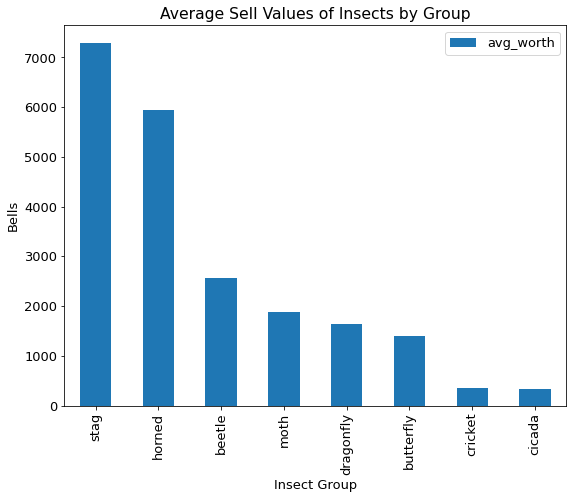

In [28]:
avg_worth_by_group_insects = pd.DataFrame([moth_avg, butterfly_avg, beetle_avg, dragonfly_avg, stag_avg, cicada_avg, horned_avg, cricket_avg], 
                                          ['moth', 'butterfly', 'beetle', 'dragonfly', 'stag', 'cicada', 'horned', 'cricket'])
avg_worth_by_group_insects = avg_worth_by_group_insects.rename(columns={0: "avg_worth"})

avg_worth_by_group_insects.sort_values(by="avg_worth", ascending=False).plot.bar()
plt.title("Average Sell Values of Insects by Group")
plt.xlabel("Insect Group")
plt.ylabel("Bells")